In [2]:
import sys
print(sys.executable)


c:\Users\Abdullah\anaconda3\envs\python_ml\python.exe


In [1]:
import plotly.express as px
import numpy as np

# Create some sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create an interactive plot with Plotly Express
fig = px.line(x=x, y=y, title='Interactive Sine Wave', 
              labels={'x': 'X-axis', 'y': 'Sin(x)'})

# Add some interactive features
fig.update_layout(
    hovermode='x',
    hoverlabel=dict(bgcolor="white", font_size=16),
)

# Add a range slider
fig.update_layout(
    xaxis=dict(
        rangeslider=dict(visible=True),
        type="linear"
    )
)

# Show the plot
fig.show()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

Dataset shape: (891, 15)

First 5 rows:
   survived  pclass

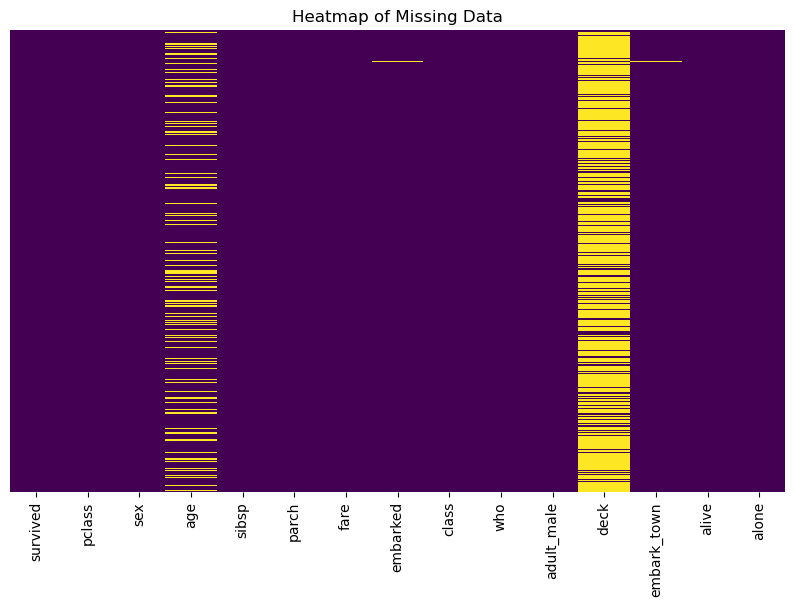

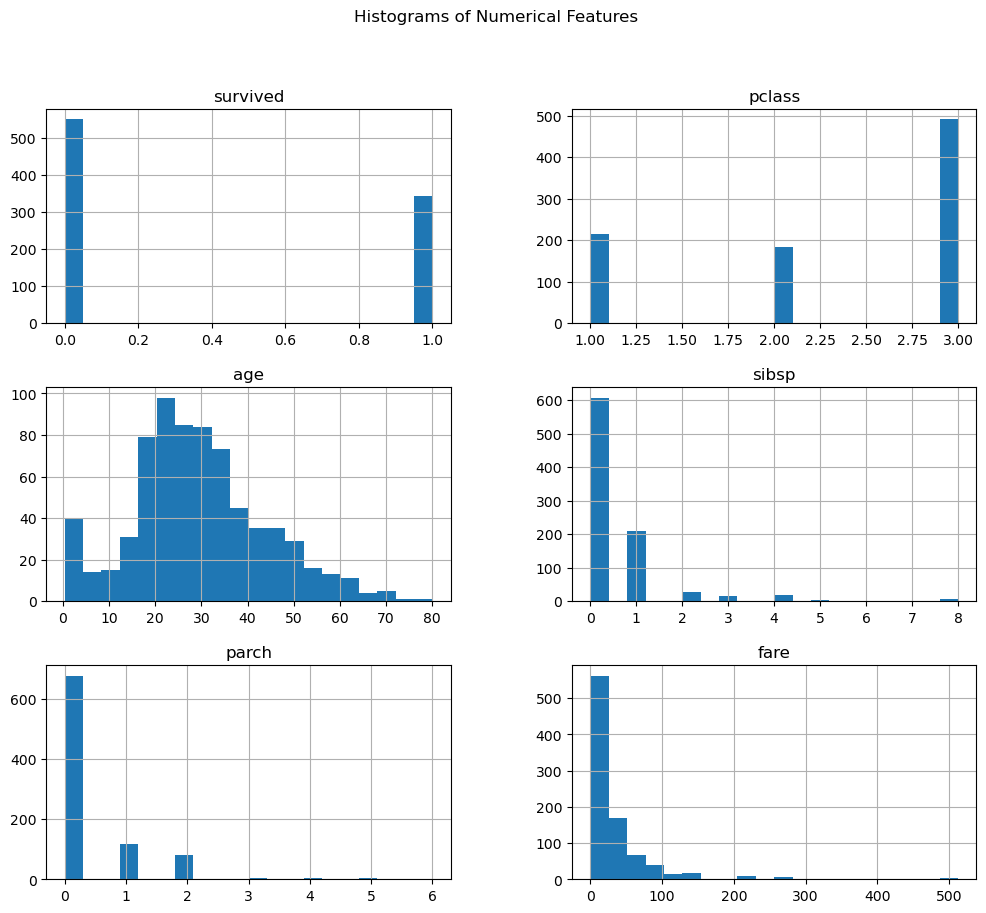

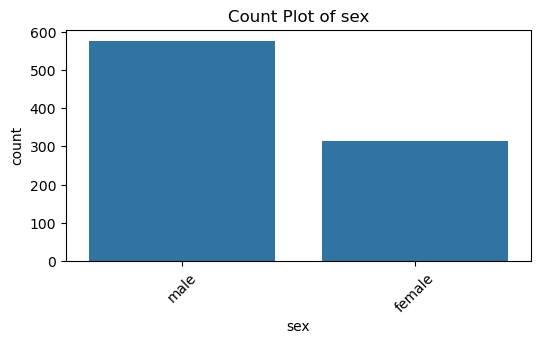

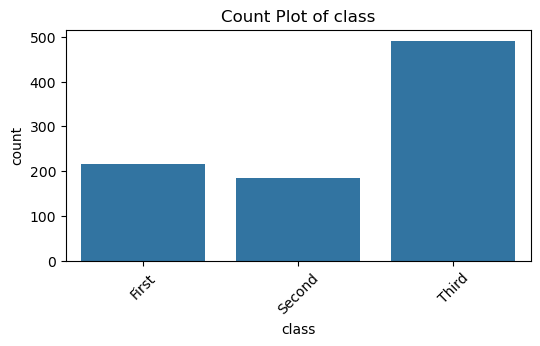

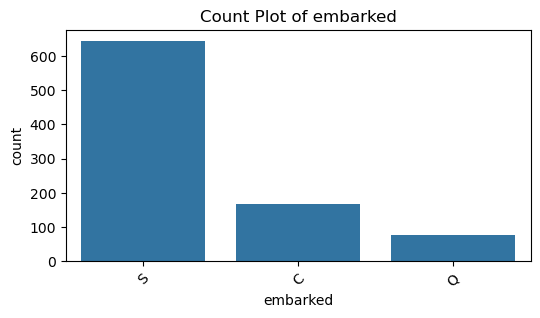

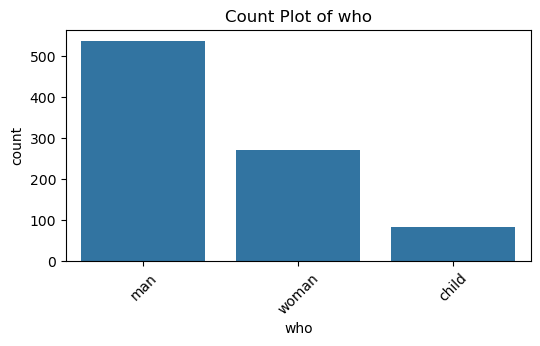

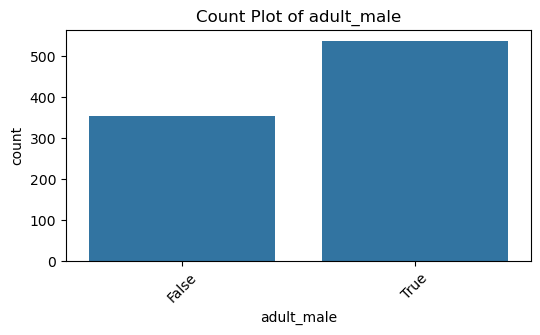

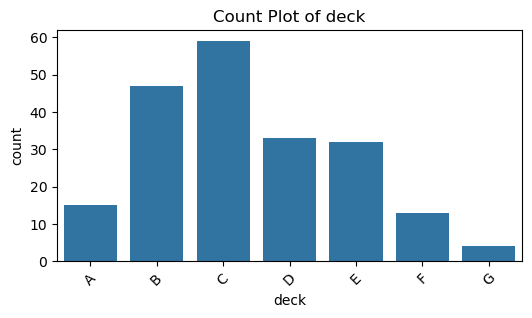

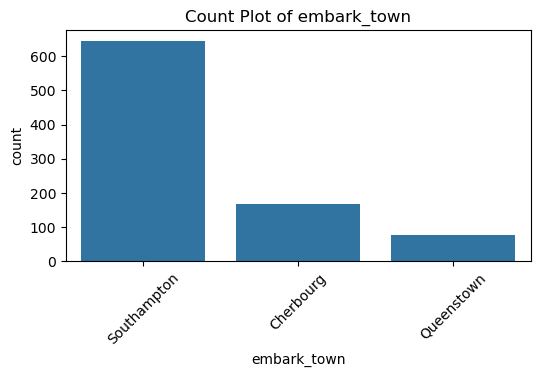

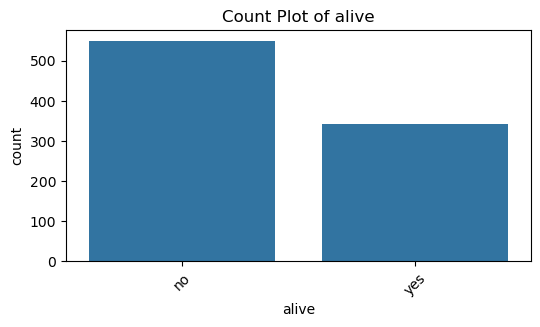

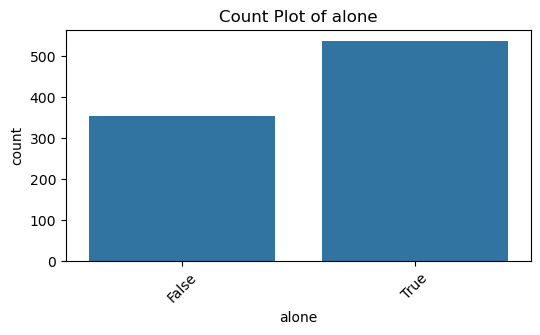


Sample data after encoding:
   survived  pclass     sex   age  sibsp  parch     fare  sex_encoded  \
0         0       3    male  22.0      1      0   7.2500            1   
1         1       1  female  38.0      1      0  71.2833            0   
2         1       3  female  26.0      0      0   7.9250            0   
3         1       1  female  35.0      1      0  53.1000            0   
4         0       3    male  35.0      0      0   8.0500            1   

   class_Second  class_Third  ...  deck_B  deck_C  deck_D  deck_E  deck_F  \
0         False         True  ...   False   False   False   False   False   
1         False        False  ...   False    True   False   False   False   
2         False         True  ...   False   False   False   False   False   
3         False        False  ...   False    True   False   False   False   
4         False         True  ...   False   False   False   False   False   

   deck_G  embark_town_Queenstown  embark_town_Southampton  alive_yes

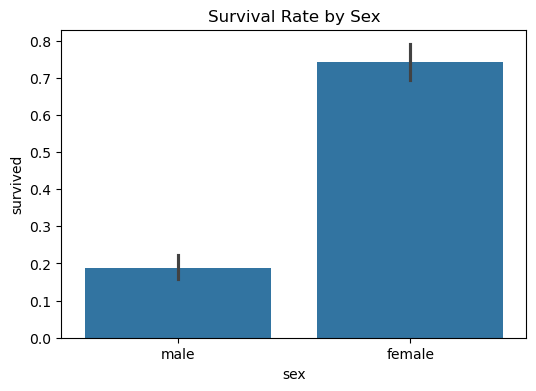

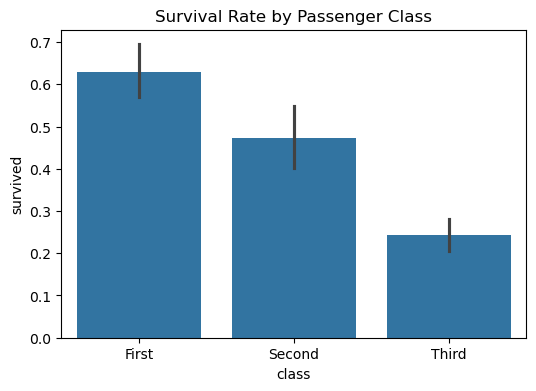

C:\Users\Abdullah\AppData\Local\Temp\ipykernel_30792\2284513686.py:79: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['survived'] == 1, 'age'].dropna(), label='Survived', shade=True)
C:\Users\Abdullah\AppData\Local\Temp\ipykernel_30792\2284513686.py:80: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['survived'] == 0, 'age'].dropna(), label='Did Not Survive', shade=True)


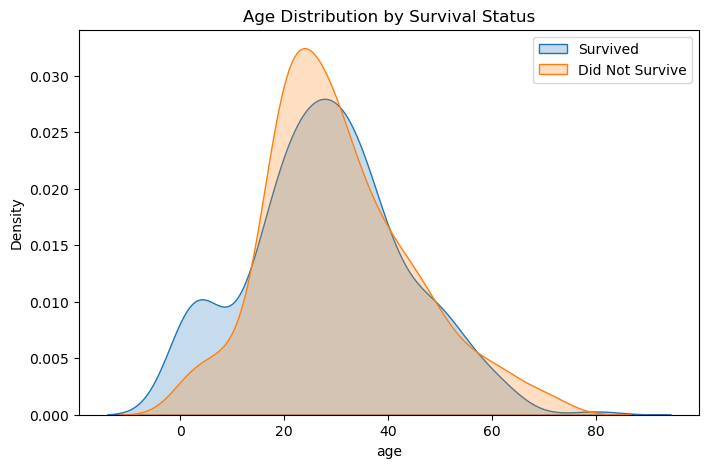

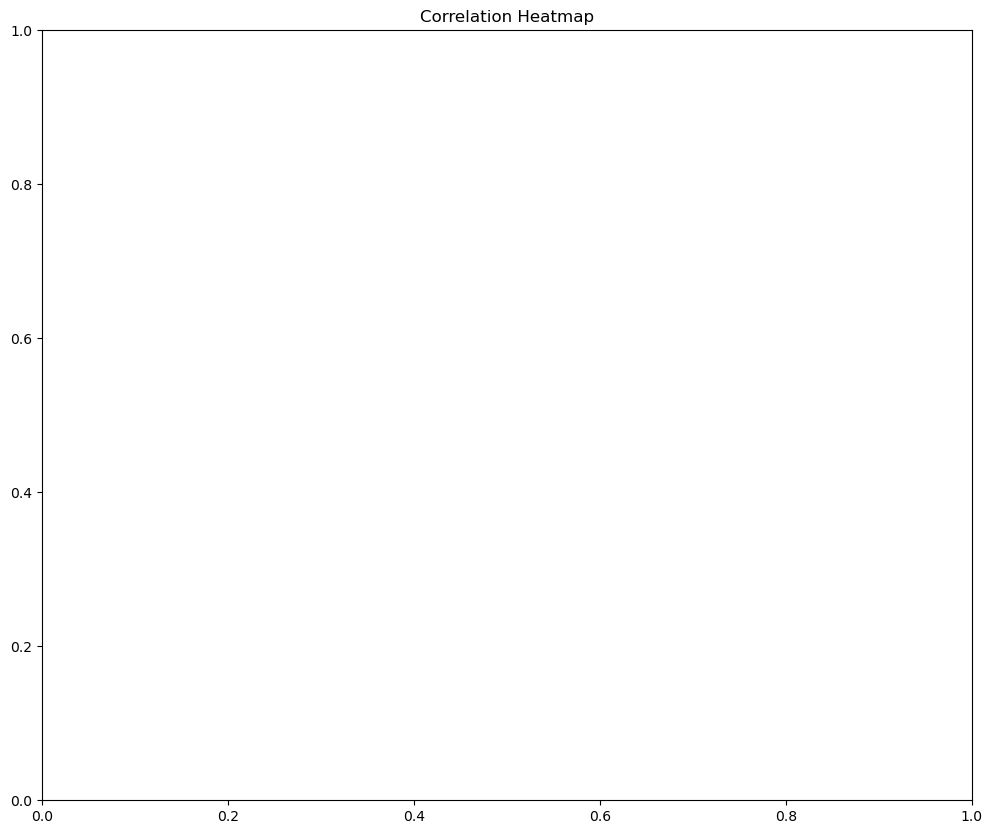

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = sns.load_dataset('titanic')

# Function to identify outliers using IQR
def find_outliers_IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers in 'age' column
age_outliers, age_lower, age_upper = find_outliers_IQR(df['age'].dropna())
print(f'Age outliers count: {len(age_outliers)}')
print(f'Age lower bound: {age_lower:.2f}, upper bound: {age_upper:.2f}')

# Detect outliers in 'fare' column
fare_outliers, fare_lower, fare_upper = find_outliers_IQR(df['fare'].dropna())
print(f'Fare outliers count: {len(fare_outliers)}')
print(f'Fare lower bound: {fare_lower:.2f}, upper bound: {fare_upper:.2f}')

# Remove outliers from the dataframe using IQR bounds - keeping only rows with values within bounds
df_no_outliers = df[
    (df['age'].isna() | ((df['age'] >= age_lower) & (df['age'] <= age_upper))) &
    (df['fare'].isna() | ((df['fare'] >= fare_lower) & (df['fare'] <= fare_upper)))
]

print(f'Original dataframe shape: {df.shape}')
print(f'Dataframe shape after removing outliers: {df_no_outliers.shape}')


# Code to find outliers of age column

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = sns.load_dataset('titanic')

# Function to identify outliers using IQR
# def find_outliers_IQR(data):
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_age = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
print(outlier_age)

     survived  pclass   sex   age  sibsp  parch     fare embarked   class  \
33          0       2  male  66.0      0      0  10.5000        S  Second   
54          0       1  male  65.0      0      1  61.9792        C   First   
96          0       1  male  71.0      0      0  34.6542        C   First   
116         0       3  male  70.5      0      0   7.7500        Q   Third   
280         0       3  male  65.0      0      0   7.7500        Q   Third   
456         0       1  male  65.0      0      0  26.5500        S   First   
493         0       1  male  71.0      0      0  49.5042        C   First   
630         1       1  male  80.0      0      0  30.0000        S   First   
672         0       2  male  70.0      0      0  10.5000        S  Second   
745         0       1  male  70.0      1      1  71.0000        S   First   
851         0       3  male  74.0      0      0   7.7750        S   Third   

     who  adult_male deck  embark_town alive  alone  
33   man        True 

# Code to find outliers of fare column

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = sns.load_dataset('titanic')

# Function to identify outliers using IQR
# def find_outliers_IQR(data):
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_fare = df[(df['fare'] < lower_bound) | (df['fare'] > upper_bound)]
print(outlier_fare)

     survived  pclass     sex   age  sibsp  parch      fare embarked  class  \
1           1       1  female  38.0      1      0   71.2833        C  First   
27          0       1    male  19.0      3      2  263.0000        S  First   
31          1       1  female   NaN      1      0  146.5208        C  First   
34          0       1    male  28.0      1      0   82.1708        C  First   
52          1       1  female  49.0      1      0   76.7292        C  First   
..        ...     ...     ...   ...    ...    ...       ...      ...    ...   
846         0       3    male   NaN      8      2   69.5500        S  Third   
849         1       1  female   NaN      1      0   89.1042        C  First   
856         1       1  female  45.0      1      1  164.8667        S  First   
863         0       3  female   NaN      8      2   69.5500        S  Third   
879         1       1  female  56.0      0      1   83.1583        C  First   

       who  adult_male deck  embark_town alive  alo

# code to remove outliers from the column

In [11]:
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]
df = df[(df['fare'] >= lower_bound) & (df['fare'] <= upper_bound)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 606 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     606 non-null    int64   
 1   pclass       606 non-null    int64   
 2   sex          606 non-null    object  
 3   age          606 non-null    float64 
 4   sibsp        606 non-null    int64   
 5   parch        606 non-null    int64   
 6   fare         606 non-null    float64 
 7   embarked     606 non-null    object  
 8   class        606 non-null    category
 9   who          606 non-null    object  
 10  adult_male   606 non-null    bool    
 11  deck         95 non-null     category
 12  embark_town  606 non-null    object  
 13  alive        606 non-null    object  
 14  alone        606 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 59.7+ KB


In [ ]:
df.describe() # it only describe the numeric data

,survived,pclass,age,sibsp,parch,fare
count,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000
mean,0.356436,2.438944,28.451733,0.493399,0.405941,18.675006
std,0.479342,0.730946,13.680940,0.959919,0.852937,13.745178
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,13.000000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,26.250000
max,1.000000,3.000000,65.000000,5.000000,6.000000,65.000000
